In [ ]:
#!pip install scikit-plot

In [1]:
!pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import xgboost

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import pickle
from joblib import dump

In [2]:
url = 'https://raw.githubusercontent.com/leilaff89/house_sales_prediction/main/datasets/house_prices_ml_features.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
X = df.drop(columns=['PRICE'],axis =1).values
y = df['PRICE'].values

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
xgb = xgboost.XGBRegressor(random_state=42)

In [8]:
params_xgb = {"colsample_bytree" : [0.6],
              "n_estimators" : [150,155,160,165,170,175,180,185,190,195,200]
              }



In [9]:
gsearch1 = GridSearchCV(estimator = xgb, param_grid = params_xgb, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [10]:
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

best params
{'colsample_bytree': 0.6, 'n_estimators': 160}
best score
0.8536532349341867


In [11]:
xgb = XGBRegressor(colsample_bytree=0.6, n_estimators=160, random_state = 42)

In [12]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=160, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
prediction = xgb.predict(X_test)

In [14]:
r2_score(y_test, prediction)

0.8608333051856731

In [15]:
mean_squared_error(y_test, prediction)

0.03618346816242133

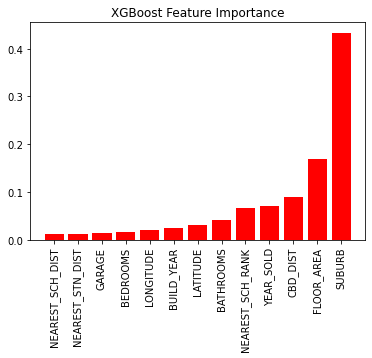

In [16]:
skplt.estimators.plot_feature_importances(xgb, feature_names=df.drop(columns=['PRICE'],axis =1).columns,
                                         title="XGBoost Feature Importance",
                                         x_tick_rotation=90, order="ascending");

In [17]:
pickle.dump(xgb, open('xgb.sav', 'wb'))
dump(xgb, 'xgb.pkl')

['xgb.pkl']